## Clustering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [4]:
# Load the excel file
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [6]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [10]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [12]:
df.shape

(3999, 12)

In [14]:
df.size

47988

In [16]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [18]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [20]:
df[df.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


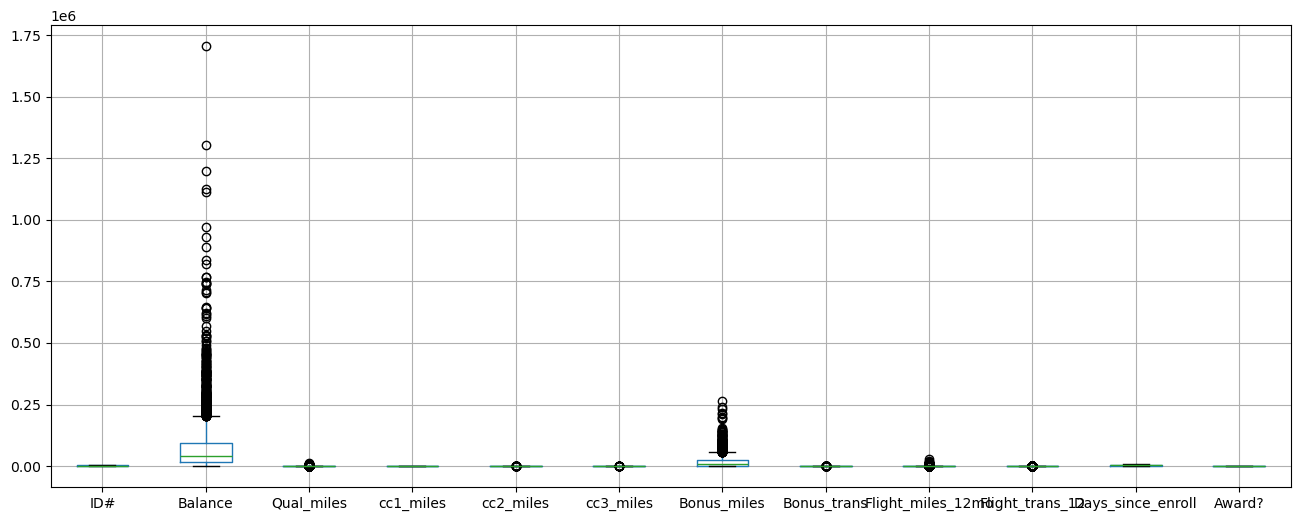

In [22]:
# identify outliers
plt.figure(figsize=(16, 6))
df.boxplot()
plt.show()

In [23]:
Q1B=df['Balance'].quantile(0.25)
Q3B=df['Balance'].quantile(0.75)
IQRB=Q3B-Q1B
print(Q1B,Q3B,IQRB)

18527.5 92404.0 73876.5


In [26]:
lower_extremeB=Q1B-1.5*IQRB
upper_extremeB=Q3B+1.5*IQRB
print(lower_extremeB,upper_extremeB)

-92287.25 203218.75


In [28]:
df_B_outliers= df[(df['Balance']<lower_extremeB) | (df['Balance']>upper_extremeB)]
df_B_outliers

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
24,25,205651,500,1,1,1,4025,21,700,4,7932,0
32,33,276571,0,4,1,1,42044,23,0,0,7872,0
43,44,619393,0,3,1,1,15008,14,0,0,7819,1
45,46,288865,967,1,1,1,23600,14,2000,4,6884,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,3777,221543,0,1,1,1,10300,5,200,3,3554,1
3756,3779,203353,0,1,1,1,14000,13,4000,8,3557,1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1
3788,3811,374613,0,1,2,1,23592,31,5000,14,3463,1


In [30]:
df_B_no_outliers= df[(df['Balance']>=lower_extremeB) & (df['Balance']<=upper_extremeB)]
df_B_no_outliers

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


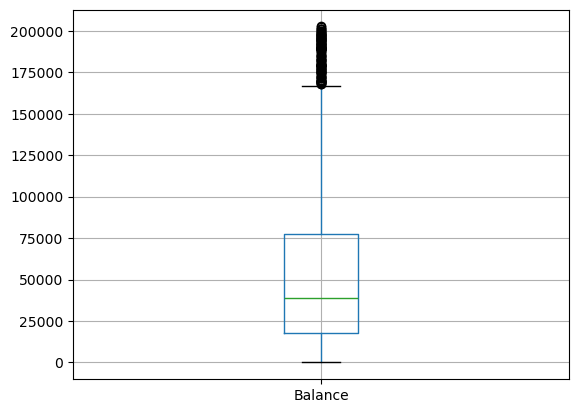

In [32]:
df_B_no_outliers.boxplot('Balance')
plt.show()

In [34]:
Q1Bo=df['Bonus_miles'].quantile(0.25)
Q3Bo=df['Bonus_miles'].quantile(0.75)
IQRBo=Q3Bo-Q1Bo
print(Q1Bo,Q3Bo,IQRBo)

1250.0 23800.5 22550.5


In [36]:
lower_extremeBo=Q1Bo-1.5*IQRBo
upper_extremeBo=Q3Bo+1.5*IQRBo
print(lower_extremeBo,upper_extremeBo)

-32575.75 57626.25


In [38]:
df= df[(df['Balance']>=lower_extremeB) & (df['Balance']<=upper_extremeB)] 
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [40]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
df.drop(columns='ID#',inplace=True)

In [44]:
features=df.drop(columns='Award?')

In [46]:
features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


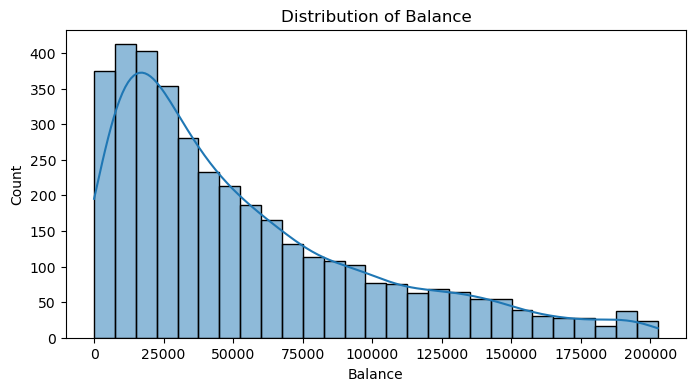

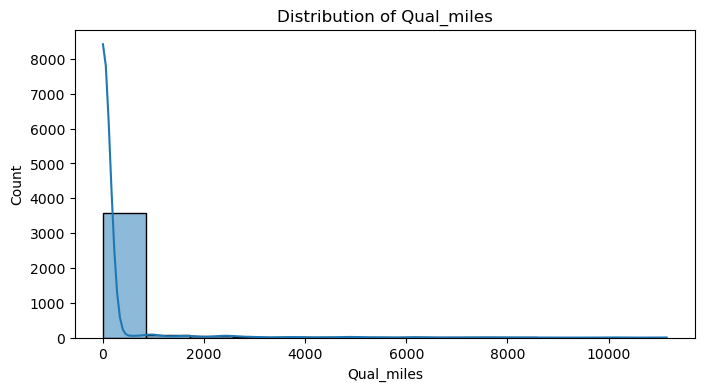

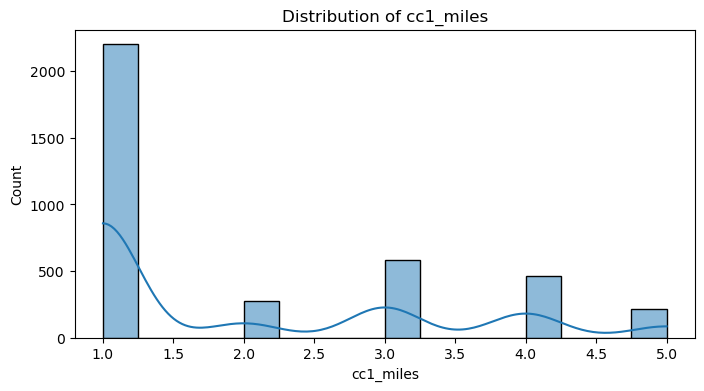

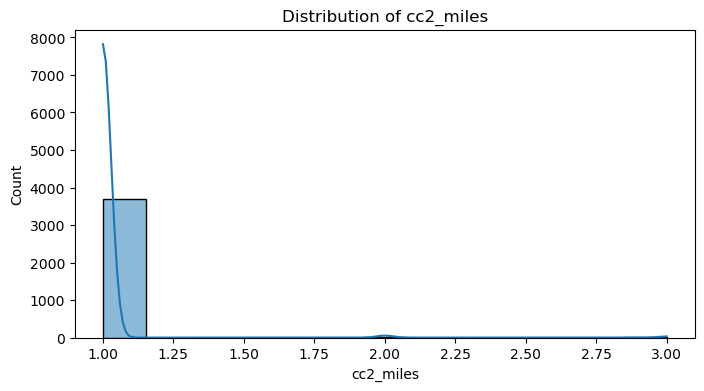

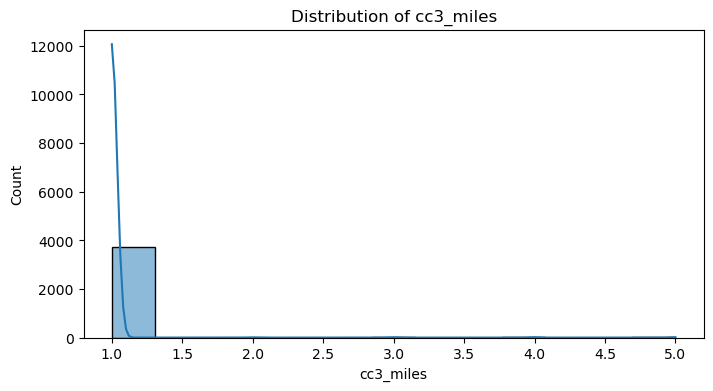

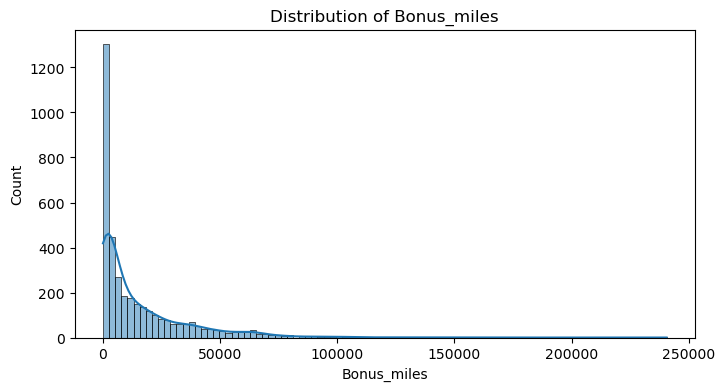

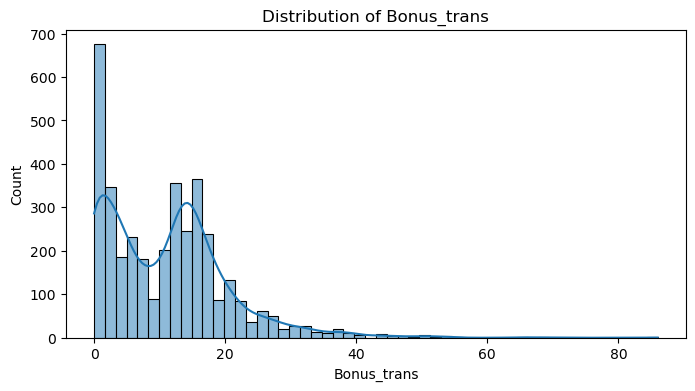

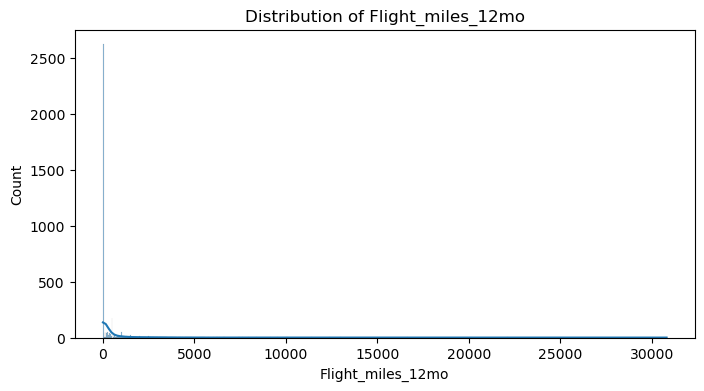

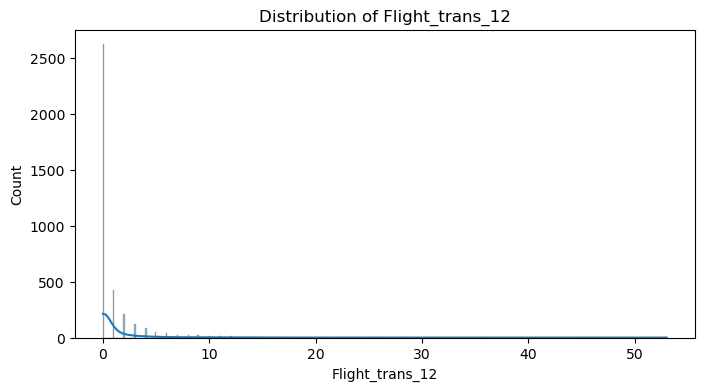

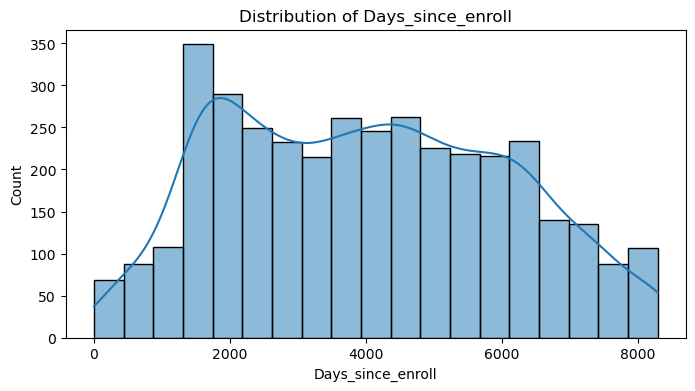

In [48]:
for column in features.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

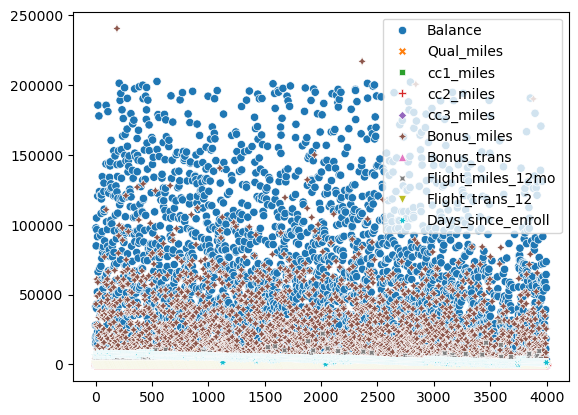

In [49]:
sns.scatterplot(data=features)
plt.show()

In [52]:
#kmeans

In [54]:
clusters=range(1,11)
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

In [56]:
inertia

[9945289999940.61,
 3693138979852.743,
 2420564952862.778,
 1976462074178.3584,
 1550563993078.967,
 1310361628524.809,
 1119218888069.8284,
 1013007867896.2148,
 876926657749.233,
 782484545954.5094]

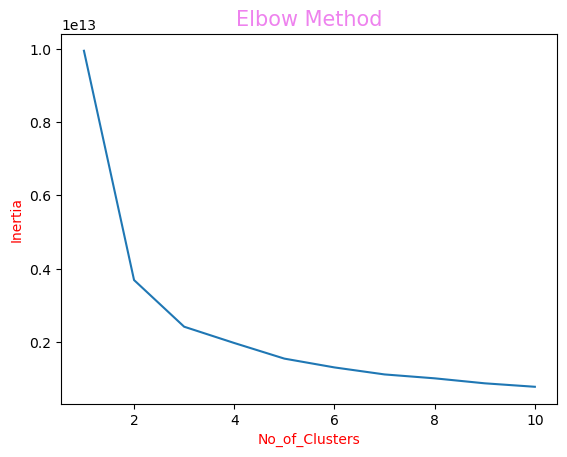

In [58]:
plt.plot(clusters,inertia)
plt.xlabel('No_of_Clusters',size=10,color='red')
plt.ylabel('Inertia',size=10,color='red')
plt.title('Elbow Method',size=15,color='Violet')
plt.show()

In [60]:
kmeans=KMeans(n_clusters=2)

In [62]:
cluster=kmeans.fit(features)
cluster

KMeans(n_clusters=2)

In [64]:
np.unique(cluster.labels_)

array([0, 1])

In [66]:
df['clusters']=cluster.labels_

In [68]:
df[df.clusters==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,96522,0,5,1,1,61105,19,0,0,6924,1,0
18,91473,0,3,1,1,27408,17,0,0,6903,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3926,89222,0,1,1,1,0,0,0,0,1528,0,0
3946,139032,0,3,1,1,19565,17,1150,4,1481,0,0
3949,170632,0,1,1,1,4650,3,0,0,1480,0,0
3961,131125,862,1,1,1,4993,11,50,1,1443,0,0


In [70]:
df[df.clusters==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


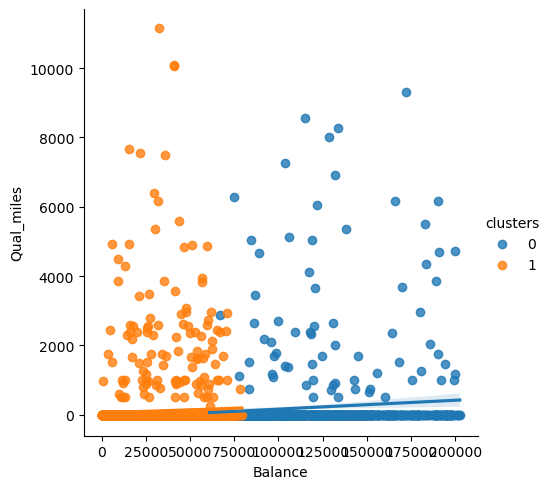

In [72]:
sns.lmplot(data=df, x='Balance', y='Qual_miles', hue='clusters')
plt.show()

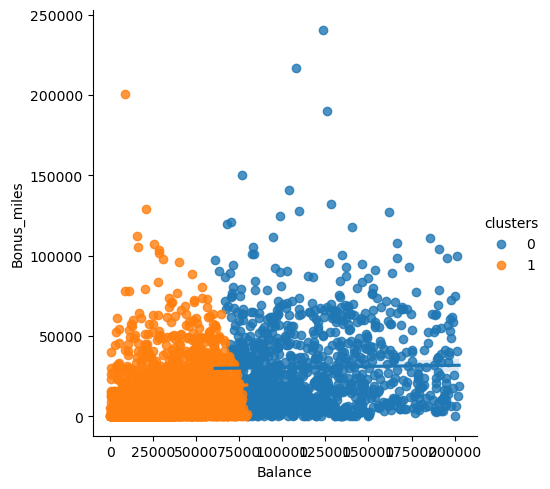

In [74]:
sns.lmplot(data=df, x='Balance', y='Bonus_miles', hue='clusters')
plt.show()

[]

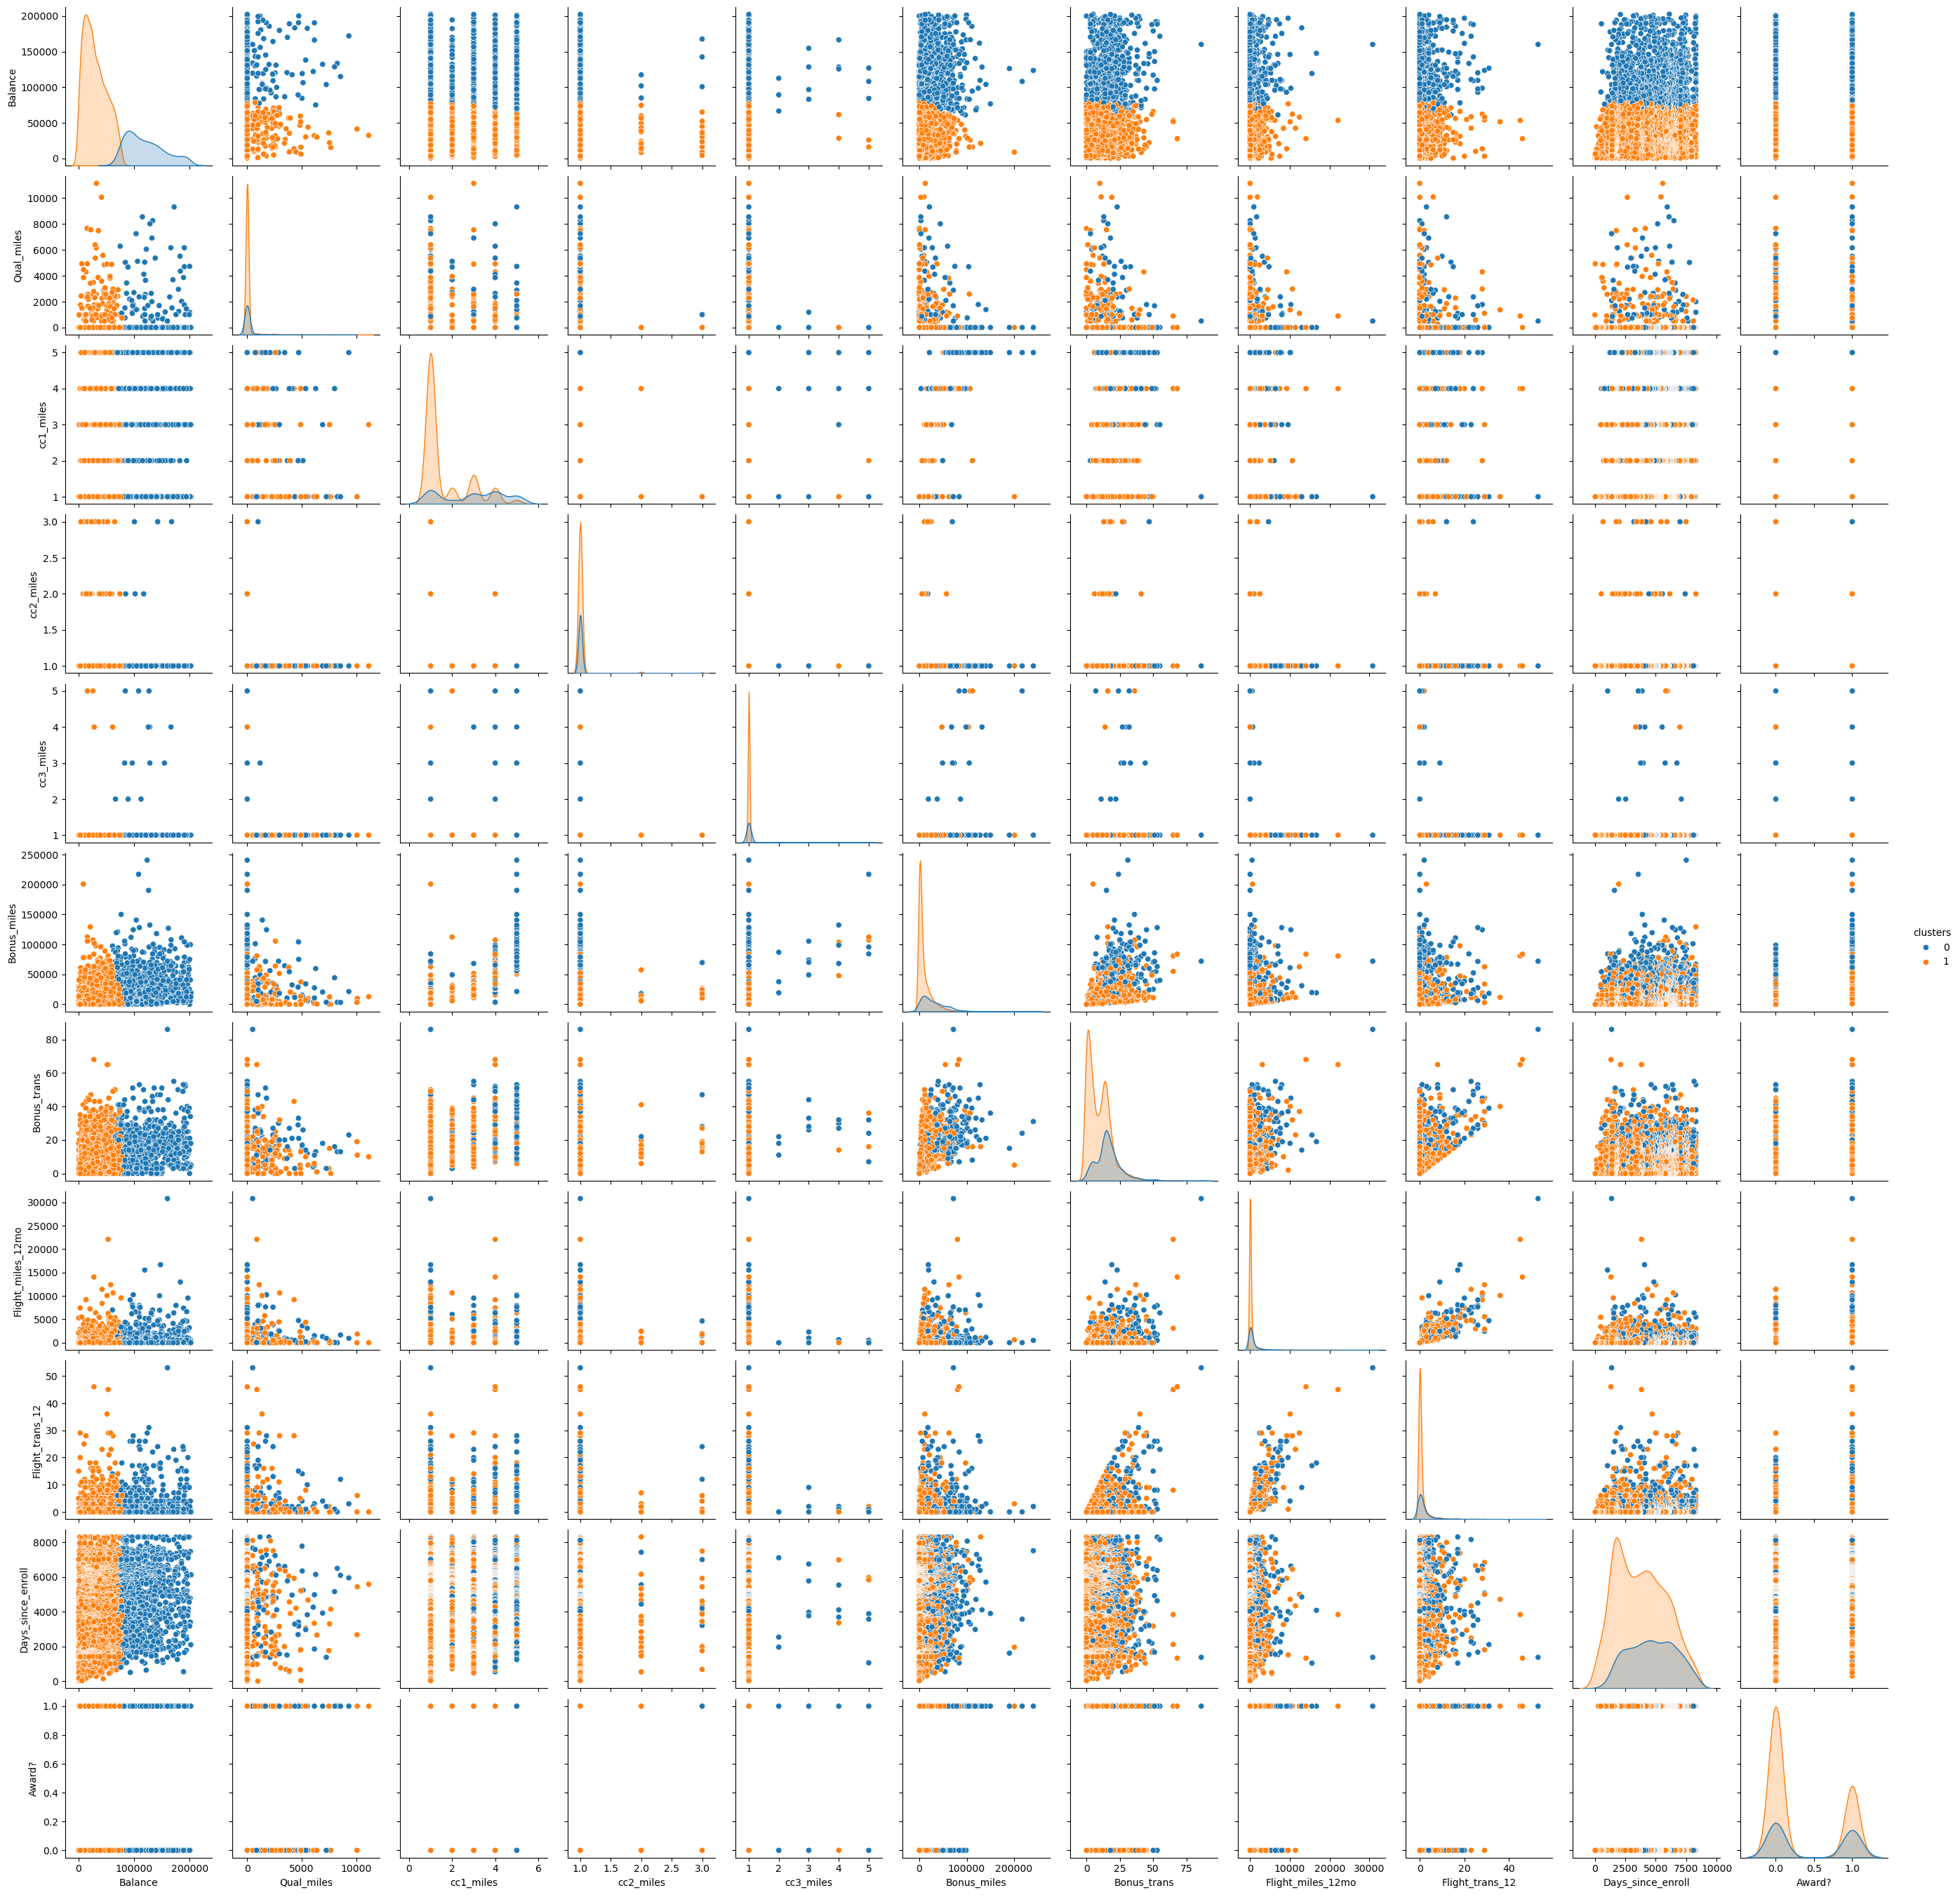

In [75]:
sns.pairplot(data=df, hue='clusters')
plt.plot()

In [76]:
from sklearn.metrics import silhouette_score

In [78]:
silhouette_score(features,cluster.labels_)

0.5997928864545974

In [82]:
# Hierarchical clustering

In [84]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

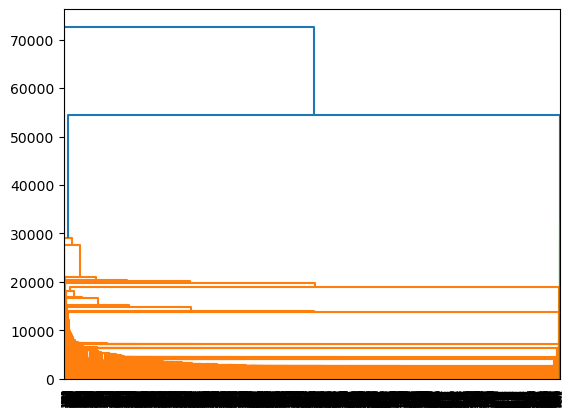

In [86]:
dendrogram=sch.dendrogram(sch.linkage(df,method='single'))

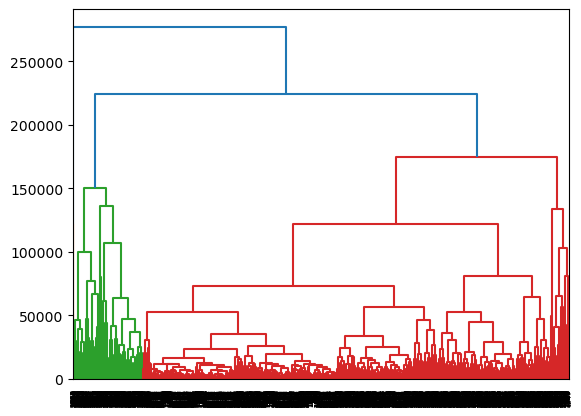

In [88]:
dendrogram=sch.dendrogram(sch.linkage(df,method='complete'))

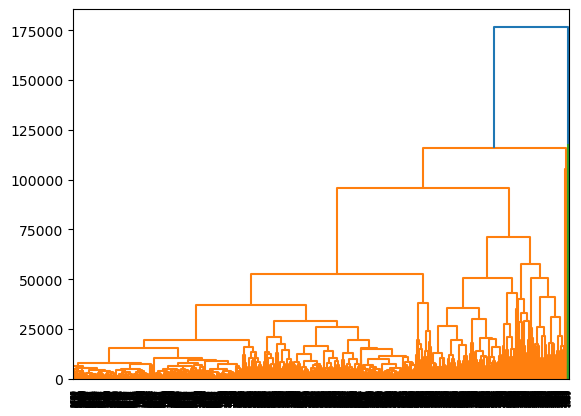

In [90]:
dendrogram=sch.dendrogram(sch.linkage(df,method='average'))

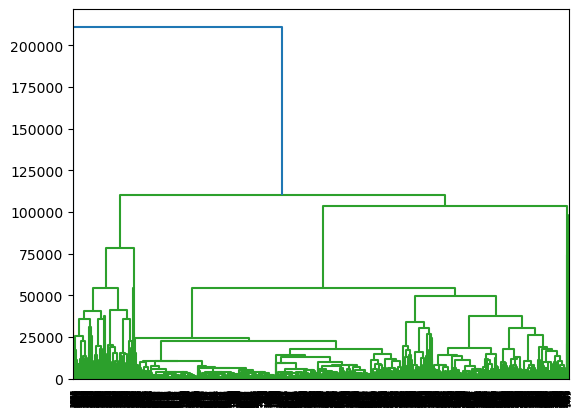

In [91]:
dendrogram= sch.dendrogram(sch.linkage(df,method='centroid'))

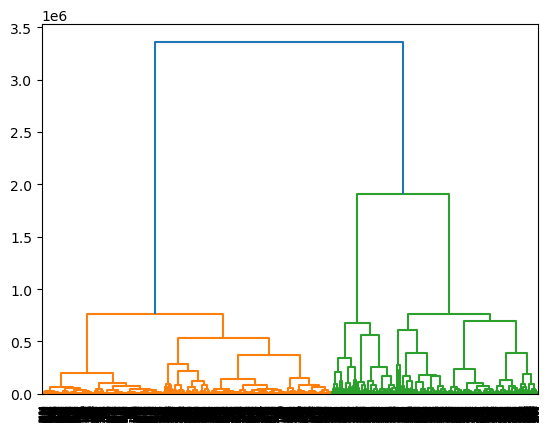

In [94]:
dendrogram= sch.dendrogram(sch.linkage(df,method='ward'))

In [140]:
agg1=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [142]:
clusters=agg1.fit(features)

In [143]:
clusters.labels_

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [146]:
silhouette_score(features,clusters.labels_)

0.5215210310111776

In [148]:
agg2=AgglomerativeClustering(n_clusters=2,linkage='single')

In [150]:
clusters=agg2.fit(features)

In [152]:
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
silhouette_score(features,clusters.labels_)

0.7025311255242562

In [156]:
agg3=AgglomerativeClustering(n_clusters=2,linkage='complete')

In [158]:
clusters=agg3.fit(features)

In [160]:
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [162]:
silhouette_score(features,clusters.labels_)

0.7162012612173129

In [164]:
agg4=AgglomerativeClustering(n_clusters=2,linkage='average')

In [166]:
clusters=agg4.fit(features)

In [168]:
clusters.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [176]:
silhouette_score(features,clusters.labels_)

0.6376297404857331

In [178]:
# DBSCAN

In [180]:
from sklearn.cluster import DBSCAN
import numpy as  np
from sklearn.preprocessing import StandardScaler

In [182]:
std_sca= StandardScaler()

In [184]:
df2= pd.DataFrame(std_sca.fit_transform(df),columns=df.columns)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,-0.547370,-0.175597,-0.743755,-0.098108,-0.062864,-0.710365,-1.079479,-0.305937,-0.344781,1.458561,-0.740053,0.602830
1,-0.736986,-0.175597,-0.743755,-0.098108,-0.062864,-0.708443,-0.972405,-0.305937,-0.344781,1.442919,-0.740053,0.602830
2,-0.265875,-0.175597,-0.743755,-0.098108,-0.062864,-0.525257,-0.758259,-0.305937,-0.344781,1.475181,-0.740053,0.602830
3,-0.832188,-0.175597,-0.743755,-0.098108,-0.062864,-0.695084,-1.079479,-0.305937,-0.344781,1.435097,-0.740053,0.602830
4,0.935832,-0.175597,1.517188,-0.098108,-0.062864,1.311157,1.597347,1.276393,0.814218,1.426787,1.351255,-1.658843
...,...,...,...,...,...,...,...,...,...,...,...,...
3728,-0.753350,-0.175597,-0.743755,-0.098108,-0.062864,-0.318914,-0.758259,-0.153570,-0.055031,-1.277427,1.351255,0.602830
3729,0.224861,-0.175597,-0.743755,-0.098108,-0.062864,-0.672537,-0.651186,-0.305937,-0.344781,-1.281337,1.351255,0.602830
3730,0.421146,-0.175597,0.763540,-0.098108,-0.062864,0.474301,-0.329967,-0.305937,-0.344781,-1.277915,1.351255,0.602830
3731,0.022737,-0.175597,-0.743755,-0.098108,-0.062864,-0.695084,-1.079479,0.074980,-0.055031,-1.278404,-0.740053,0.602830


In [188]:
df2.describe().round(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
count,3733.000,3733.000,3733.000,3733.000,3733.000,3733.000,3733.000,3733.000,3733.000,3733.000,3733.000,3733.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.147,-0.176,-0.744,-0.098,-0.063,-0.719,-1.187,-0.306,-0.345,-1.962,-0.740,-1.659
25%,-0.775,-0.176,-0.744,-0.098,-0.063,-0.667,-0.865,-0.306,-0.345,-0.865,-0.740,-1.659
50%,-0.323,-0.176,-0.744,-0.098,-0.063,-0.426,-0.009,-0.306,-0.345,-0.038,-0.740,0.603
75%,0.505,-0.176,0.764,-0.098,-0.063,0.292,0.527,-0.129,-0.055,0.799,1.351,0.603
max,3.171,14.766,2.271,13.220,20.343,10.557,8.022,23.172,15.012,2.092,1.351,0.603


In [192]:
eps = [1,2,3,4,5,6,7]  
min_node =range(1,11)

In [198]:
output= []
for i in eps:
    for j in min_node:
        labels= DBSCAN(eps=i,min_samples=j).fit(df2).labels_
        score= silhouette_score(df2,labels)
        output.append([i,j,score])

In [199]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [202]:
output

[[1, 1, -0.19432627361904972],
 [1, 2, -0.0450017105082866],
 [1, 3, -0.014137387331599012],
 [1, 4, 0.025773396737258064],
 [1, 5, 0.21901812458990072],
 [1, 6, 0.21589867751875003],
 [1, 7, 0.22259727604594393],
 [1, 8, 0.22417718071267798],
 [1, 9, 0.21029968919689135],
 [1, 10, 0.20799215431396206],
 [2, 1, 0.23866467755073628],
 [2, 2, 0.2638290474379975],
 [2, 3, 0.2740601623464596],
 [2, 4, 0.27851838045105426],
 [2, 5, 0.27907986415616354],
 [2, 6, 0.27812043374143064],
 [2, 7, 0.2781731818499059],
 [2, 8, 0.2781637873166853],
 [2, 9, 0.27449978343690645],
 [2, 10, 0.2743938437074298],
 [3, 1, 0.3326766130418696],
 [3, 2, 0.49205960806108245],
 [3, 3, 0.4922747512912939],
 [3, 4, 0.5028540343519199],
 [3, 5, 0.5035327197248558],
 [3, 6, 0.5049325816435375],
 [3, 7, 0.5053306092859244],
 [3, 8, 0.5057726950192574],
 [3, 9, 0.5060755606012696],
 [3, 10, 0.5061840927861336],
 [4, 1, 0.4324925388808895],
 [4, 2, 0.43794298110177804],
 [4, 3, 0.43794298110177804],
 [4, 4, 0.49721833

In [204]:
score

0.8380254416276633

In [206]:
a=pd.DataFrame(output)
score=a.iloc[:,2].max()

In [208]:
score

0.8571328504938187

In [210]:
a[a[2]==score]

,0,1,2
60,7,1,0.857133
61,7,2,0.857133
62,7,3,0.857133


In [214]:
labels=DBSCAN(eps=5,min_samples=6).fit(df2).labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

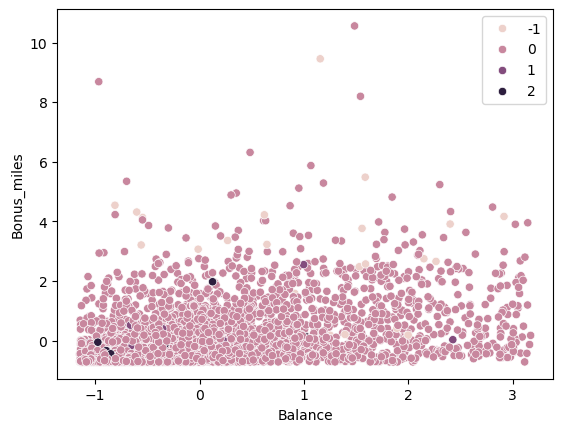

In [218]:
sns.scatterplot(data=df2,x='Balance',y='Bonus_miles',hue=labels)

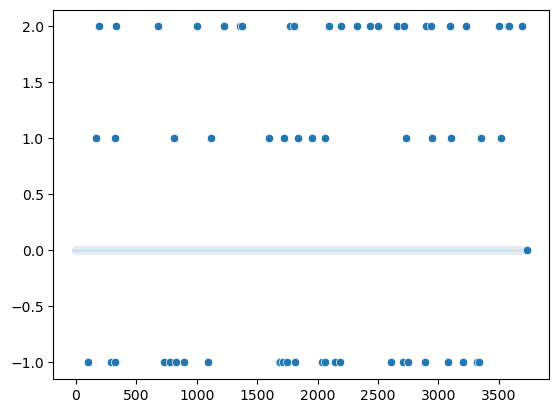

In [220]:
sns.scatterplot(data=labels)
plt.show()

In [222]:
# From the analysis DBSCAN is more accurate than K means